# import libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# the classifier 

this classifier can classify multiple label classification problems. The method that we use here for sovling multi-class classification is one vs all. This class consists of multiple static functions, attributes and methods. Here is a brief description of Ali_classifier class:

## 1. Symbols:
* **X:** Training set with the shape of $n_s \times n_f$
* **Y:** Labels' vector. This vector may have more than two labels if we have multiple class in our problem 
* **$\alpha$:** learning rate 
* **itter:** Number of iterations for our optimization method 
* **loss_func:** The loss function that we use for our optimization.
* **penalize_constant:** The regularization constant. The regularization the we use here is l2. 
* **batch_size:** size of the batches
* **epoch_number:** number of epochs 
* **$\beta$:** The constant the is used for getting weighted average 
* **$\gamma$:** The constant in RMS Gradient descent optimization method  

## 2. Static functions
All the optimization functions return w_fit (the optimized values of weights) and the history of cost. Note that the values in the first row of w_fit are the bias terms for different classes. 
* **sigmoid function:** this function applies the sigmoid function on variable x 

### 2.1 optimization methods 
* **GD:** Gradient descent optimization method.
* **MBGD:** mini-batch gradient descent optimization method. 
* **MomentumSGD:** Gradient descent with momentum 
* **rmsSGD:** RMS prop gradient descent 
### 2.2 loss functions
All the loss functions return dw (the step that we should take in our optimization) and the error. 
* ** log_loss:** log loss also knowns as cross entropy
* ** MSE_loss:** Mean square error loss function. It is not recommended to use this loss in your classification problems due to non-convexity of this loss for most classification problems 
* **hinge_loss:** hinge loss. 
## 3. How to use Ali_classifier
In order to use this classifier, you should take following steps: 

1. First make a classifier object. The input parameters of this object are: loss function, optimization method and the regularization constant. The possible values for loss function are 'log', 'MSE' and 'hinge. The possible values for optimization method are 'GD', 'MBGD', 'MomentumSGD' and 'rmsSGD'. 
2. Based on the optimization method you choose, the program asks you to enter the required parameters for that specific optimization method. 
3. After making the classifier object, you should call 'fit' method on this object with X and Y as its inputs. Note that both the X and Y should be numpy arrays. 
4. Now you can call w_fit and cost attributes on your object to get the fitted weights and the values of cost function in each steps, repectively. 
6. By calling score method on your object, you can see how the classification works for your given data set 
6. You can call predict method to predict the label of new data. To get the labes, after you call the predict method, you can call the Y_predict to get the predicted labels. for you new data. 
7. You can split your data set into train and test with split_train_test method 




In [10]:
class Ali_classifier():
    def sigmoid(x): #sigmoid function 
        return 1/(1+np.exp(-x))
    ################################################ Optimization methods################################################
    def GD(X,Y,alpha,itter,loss_func,penalize_constant): #Gradient Descent 
        class_num=len(set(Y))
        if class_num==2:
            class_num=1
        n_s=len(Y)
        n_f=X.shape[1]
        w = np.random.uniform(-2,2,(n_f+1,class_num))
        X=np.c_[np.ones((n_s,1)),X]
        print('w start= ',w)
        cost=np.zeros((itter,class_num))
        p=np.random.permutation(n_s)
        X=X[p,:]
        Y=Y[p]
        for item in range(class_num):
            Y_class=(Y==item).astype(int)
            for i in range(itter): 
                dw,error=loss_func(X,Y_class,w[:,item],penalize_constant)
                dw=dw/n_s
                cost[i,item]=error/n_s
                w[:,item]=w[:,item]-alpha*dw
        return w,cost
    
    def MBGD(X,Y,alpha,batch_size,epoch_number,loss_func,penalize_constant): #mini batch gradient descent
        class_num=len(set(Y))
        if class_num==2:
            class_num=1
        n_s=len(Y)
        n_f=X.shape[1]
        w = np.random.uniform(-2,2,(n_f+1,class_num))
        X=np.c_[np.ones((n_s,1)),X]
        print('w start= ',w)
        cost=np.zeros((epoch_number*int(n_s/batch_size),class_num))
        p=np.random.permutation(n_s)
        X=X[p,:]
        Y=Y[p]
        for item in range(class_num):
            Y_class=np.array((Y==item).astype(int))
            print('************class:************',item)
            for i in range(epoch_number):
                p=np.random.permutation(n_s)
                X=np.array(X[p,:])
                Y_class=Y_class[p]
                print(X)
                print(Y_class)
                for j in range(int(n_s/batch_size)):
                    X_batch=X[j*batch_size:min(n_s,(batch_size)*(j+1))] 
                    Y_batch=Y_class[j*batch_size:min(n_s,(batch_size)*(j+1))]
                    dw,error=loss_func(X_batch,Y_batch,w[:,item],penalize_constant)
                    dw=dw/batch_size
                    cost[(i+1)*j,item]=error/n_s
                    w[:,item]=w[:,item]-alpha*dw
        return w,cost
    
    def MomentumSGD(X,Y,alpha,batch_size,epoch_number,beta,loss_func,penalize_constant): #mini batch gradient descent with momentum
        class_num=len(set(Y))
        if class_num==2:
            class_num=1
        n_s=len(Y)
        n_f=X.shape[1]
        w = np.random.uniform(-2,2,(n_f+1,class_num))
        X=np.c_[np.ones((n_s,1)),X]
        print('w start= ',w)
        cost=np.zeros((epoch_number*int(n_s/batch_size),class_num))
        for item in range(class_num):
            Y_class=(Y==item).astype(int)
            dw_avg=np.zeros(n_f+1)
            for i in range(epoch_number):
                #X, Y_class = shuffle(X, Y_class, random_state=0)
                #p=np.random.permutation(n_s)
                #X=X[p]
                #Y_class=Y_class[p]
                for j in range(int(n_s/batch_size)):
                    X_batch=X[j*batch_size:min(n_s,(batch_size+1)*(j+1))] 
                    Y_batch=Y_class[j*batch_size:min(n_s,(batch_size+1)*(j+1))]
                    dw,error=loss_func(X_batch,Y_batch,w[:,item],penalize_constant)
                    dw=dw/batch_size
                    cost[i,item]=error/n_s
                    dw_avg = ( (beta) * dw_avg + (1-beta) * dw )
                    w[:,item]=w[:,item]-alpha*dw_avg
        return w,cost

    def rmsSGD(X,Y,alpha,batch_size,epoch_number,gamma,eps,loss_func,penalize_constant): #mini batch gradient descent with rms
        class_num=len(set(Y))
        if class_num==2:
            class_num=1
        n_s=len(Y)
        n_f=X.shape[1]
        w = np.random.uniform(-2,2,(n_f+1,class_num))
        X=np.c_[np.ones((n_s,1)),X]
        print('w start= ',w)
        cost=np.zeros((epoch_number*int(n_s/batch_size),class_num))
        for item in range(class_num):
            Y_class=(Y==item).astype(int)
            dw_avg=np.zeros(n_f+1)
            for i in range(epoch_number):
                #p=np.random.permutation(n_s)
                #X=X[p,:]
                #Y_class=Y_class[p]
                for j in range(int(n_s/batch_size)):
                    X_batch=X[j*batch_size:min(n_s,(batch_size+1)*(j+1))] 
                    Y_batch=Y_class[j*batch_size:min(n_s,(batch_size+1)*(j+1))]
                    dw,error=loss_func(X_batch,Y_batch,w[:,item],penalize_constant)
                    dw=dw/batch_size
                    cost[i,item]=error/n_s
                    dw_avg = ( gamma * dw_avg + (1-gamma) * dw**2 )
                    w[:,item] = w[:,item] - alpha*dw/np.sqrt(dw_avg+eps)
        return w,cost
    
    ########################################## end optimization methods ######################################################################### 
    ##########################################      loss functions      #########################################################################
    def log_loss(X,Y,w,lam):
        predictions=Ali_classifier.sigmoid(X@w)
        error = sum((-Y * np.log(predictions+0.0000000000000001)) - ((1-Y)*np.log(1-predictions+0.0000000000000001)))+sum(w**2)
        dw = (predictions - Y) @ X+lam*w
        return dw,error
    
    def MSE_loss(X,Y,w,lam):
        error=sum((Y-X@w)**2)+sum(w**2)
        dw=(X@w-Y)@X+lam*w
        return dw,error

    def hinge_loss(X,Y,w,lam):
        Y_hinge=2*Y-1
        predictions=X@w
        error=sum(np.maximum(0,(1-Y_hinge*predictions)))+sum(w**2)
        Y_hinge[np.where(1-Y_hinge*predictions<0)]=0
        dw=-Y_hinge@X+lam*w
        return dw,error
    ##################################################################  end loss functions #########################################################################
    optimization={'GD':GD,'MBGD':MBGD,'MomentumSGD':MomentumSGD,'rmsSGD':rmsSGD}
    loss={'log':log_loss,'MSE':MSE_loss,'hinge':hinge_loss}
    
    def __init__(self,loss_function,optimization_method,penalize_constant):
        self.loss_function=loss_function
        self.optimization_method=optimization_method
        self.lam=penalize_constant
        
        if self.optimization_method=='GD':
            print('please enter learning rate ($\\alpha$) and number of itterations:')
            print('alpha=',end="")
            self.alpha=float(input())
            print(self.alpha)
            print('number of itterations:',end="")
            self.itter=int(input())
            print(self.itter)
        
        if self.optimization_method=='MBGD' or self.optimization_method=='MomentumSGD':
            print('please enter learning rate ($\\alpha$), batch_size and number of epochs and beta:')
            
            print('alpha= ',end="")
            self.alpha=float(input())
            print(self.alpha)
            
            print('batch size= ',end="")
            self.batch=int(input())
            print(self.batch)
            
            print('number of epochs= ',end="")
            self.epochs=int(input())
            print(self.epochs)

            print('beta= ',end="")
            self.beta=float(input())
            print(self.beta)

        if self.optimization_method=='rmsSGD':
            print('please enter learning rate ($\\alpha$), batch_size and number of epochs and gamma:')
            
            print('alpha= ',end="")
            self.alpha=float(input())
            print(self.alpha)
            
            print('batch size= ',end="")
            self.batch=int(input())
            print(self.batch)
            
            print('number of epochs= ',end="")
            self.epochs=int(input())
            print(self.epochs)

            print('gamma= ',end="")
            self.gamma=float(input())
            print(self.gamma)

            print('epsilon= ',end="")
            self.eps=float(input())
            print(self.eps)
        



    def split_train_test(self,X,Y,test_size=0.25):
        f=list(range(X.shape[0]))
        r=np.random.choice(f,int(test_size*X.shape[0]),replace=False)
        self.X_test=X[r]
        self.Y_test=Y[r]
        self.X_train=X[np.delete(f,r)]
        self.Y_train=Y[np.delete(f,r)]

    def fit(self,X,Y): #fit method 
        self.classes=np.arange(len(set(Y)))
        self.X=X.copy() 
        self.Y=Y.copy()
        if self.optimization_method=='GD':
            self.w_fit,self.cost=Ali_classifier.optimization[self.optimization_method](X,Y,self.alpha,self.itter,Ali_classifier.loss[self.loss_function],self.lam)
        if self.optimization_method=='MBGD':
            self.w_fit,self.cost=Ali_classifier.optimization[self.optimization_method](X,Y,self.alpha,self.batch,self.epochs,Ali_classifier.loss[self.loss_function],self.lam)
        if self.optimization_method=='MomentumSGD':
            self.w_fit,self.cost=Ali_classifier.optimization[self.optimization_method](X,Y,self.alpha,self.batch,self.epochs,self.beta,Ali_classifier.loss[self.loss_function],self.lam)
        if self.optimization_method=='rmsSGD':
            self.w_fit,self.cost=Ali_classifier.optimization[self.optimization_method](X,Y,self.alpha,self.batch,self.epochs,self.gamma,self.eps,Ali_classifier.loss[self.loss_function],self.lam)
        self.y_predict=np.argmax(self.X@self.w_fit[1:,:]+self.w_fit[0,:],axis=1)

    def predict(self,X): #prediction method 
        X=np.c_[np.ones((X.shape[0],1)),X]
        Y_p=X@self.w_fit
        self.Y_predict=np.zeros(X.shape[0],dtype=int)
        for row in range(Y_p.shape[0]):
            self.Y_predict[row]=np.argmax(Y_p[row,:])
    
    def score(self,Y,y_predict): #score method 
        self.confusion_mat=np.zeros((len(self.classes),len(self.classes))) #vertical axis represents the true labels and the horizental axis represent the predicted labels 
        for item in self.classes:
            y_prime=np.where(Y==item)
            for i in y_prime[0]:
                self.confusion_mat[item,y_predict[i]]+=1
        
        self.score_table=pd.DataFrame(index=['recal','precision','f1'],columns=list(range(len(self.classes))))
        for item in self.classes:
            self.score_table.loc['recal',item]=self.confusion_mat[item,item]/sum(self.confusion_mat[item,:])
            self.score_table.loc['precision',item]=self.confusion_mat[item,item]/sum(self.confusion_mat[:,item])
            self.score_table.loc['f1',item]=2*self.confusion_mat[item,item]/(sum(self.confusion_mat[item,:])+sum(self.confusion_mat[:,item]))

let's examine our classifier. First we make a toy data set with sklearn. 

Text(0, 0.5, 'x2')

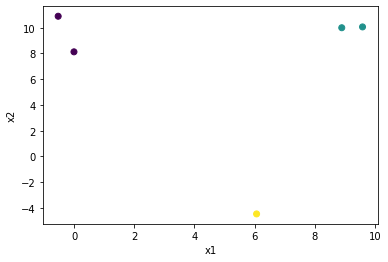

In [5]:
from sklearn.datasets import make_blobs,make_circles
n_s=5
class_num=3
X, Y = make_blobs(n_samples=n_s,centers=class_num)
plt.scatter(*X.T,c=Y)
plt.xlabel('x1')
plt.ylabel('x2')
#from sklearn.preprocessing import PolynomialFeatures
#poly=PolynomialFeatures(2,include_bias=False)
#X_poly=poly.fit_transform(X)

Now the classification: 

you can chage the loss function and optimization method and see the results. 

In [11]:
clf=Ali_classifier('log','MBGD',0.0001)
clf.split_train_test(X,Y)
clf.fit(clf.X_train,clf.Y_train)

please enter learning rate ($\alpha$), batch_size and number of epochs and beta:
alpha= 0.1
batch size= 50
number of epochs= 3
beta= 0.9
w start=  [[-1.79150641  1.2096966   0.8123344 ]
 [-0.52204491  1.15269471  1.92673907]
 [-0.05297342  1.57415708  1.8230478 ]]
************class:************ 0
[[ 1.00000000e+00 -1.84698067e-03  8.12615089e+00]
 [ 1.00000000e+00  6.06829321e+00 -4.46619840e+00]
 [ 1.00000000e+00 -5.26948106e-01  1.08913207e+01]
 [ 1.00000000e+00  8.89953375e+00  9.99837401e+00]]
[1 0 1 0]
[[ 1.00000000e+00  6.06829321e+00 -4.46619840e+00]
 [ 1.00000000e+00  8.89953375e+00  9.99837401e+00]
 [ 1.00000000e+00 -5.26948106e-01  1.08913207e+01]
 [ 1.00000000e+00 -1.84698067e-03  8.12615089e+00]]
[0 0 1 1]
[[ 1.00000000e+00  6.06829321e+00 -4.46619840e+00]
 [ 1.00000000e+00 -5.26948106e-01  1.08913207e+01]
 [ 1.00000000e+00  8.89953375e+00  9.99837401e+00]
 [ 1.00000000e+00 -1.84698067e-03  8.12615089e+00]]
[0 1 0 1]
************class:************ 1
[[ 1.00000000e+00  8.899

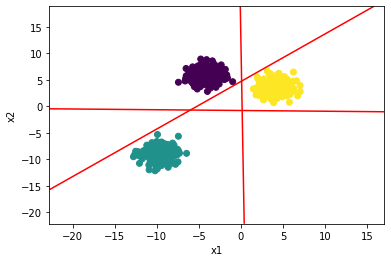

In [556]:
delta=0.1
#w1=clf1.coef_
#w2=clf_1.w_fit
off_set=10
w=clf.w_fit
x = np.arange(min(X[:,0])-off_set,max(X[:,0])+off_set, delta)
y = np.arange(min(X[:,1])-off_set, max(X[:,1])+off_set, delta)
X1, Y1 = np.meshgrid(x, y)
ll=len(set(Y))
if ll==2:
    ll=1
for i in range(ll):
    #if i==4:
    #Z1=w[0,i]+w[1,i]*X1+w[2,i]*Y1+w[3,i]*X1**2+w[4,i]*X1*Y1+w[5,i]*Y1**2
    #Z1=w[0,i]+w[1,i]*X1+w[2,i]*Y1+w[3,i]*X1**2+w[4,i]*Y1**2
    #Z2=w2[1,i]*X1+w2[2,i]*Y1+w2[0,i]
    #plt.contour(X1,Y1,Z2,[0],colors='g')
    #Z1=clf1.intercept_[i]+w1[i,0]*X1+w1[i,1]*Y1+w1[i,2]*X1**2+w1[i,3]*X1*Y1+w1[i,4]*Y1**2
    #Z1=w[0,i]+w[1,i]*X1+w[2,i]*Y1+w[3,i]*X1**2+w[4,i]*X1*Y1+w[5,i]*Y1**2
    Z1=w[0,i]+w[1,i]*X1+w[2,i]*Y1
    plt.contour(X1,Y1,Z1,[0],colors='r')
    #plt.contour(X1,Y1,Z1,[0],colors='g')
#Z1=w1[0,0]*X1+w1[0,1]*Y1+clf1.intercept_
#Z1=clf1.intercept_[0]+w1[0,0]*X1+w1[0,1]*Y1+w1[0,2]*X1**2+w1[0,3]*X1*Y1+w1[0,4]*Y1**2
#plt.contour(X1,Y1,Z1,[0],colors='g')

plt.scatter(*X.T, c=Y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

The red lines in above figure are the descision boundry. Now lets check the scores: 

In [557]:
clf.score(clf.Y_train,clf.y_predict)

In [558]:
clf.score_table

,0,1,2
recal,1,1,1
precision,1,1,1
f1,1,1,1


confusion matrix 

In [559]:
clf.confusion_mat

array([[249.,   0.,   0.],
       [  0., 258.,   0.],
       [  0.,   0., 243.]])

now we try to predict the test set 

In [560]:
clf.predict(clf.X_test)

In [561]:
clf.score(clf.Y_test,clf.Y_predict)

In [562]:
clf.score_table

,0,1,2
recal,1,1,1
precision,1,1,1
f1,1,1,1
